# Self Driving Cars con Decision Trees
El objetivo de este notebook es mostrar cómo varía la Accuracy de Decision Trees según los parámetros del algoritmo.

Se consideran dos parámetros: `min_samples_split` y `max_depth`.

Se consideran distintos valores para los parámetros y se grafica la Accuracy en función de los parámetros.

## Simular datos del terreno


In [ ]:
import random

def makeTerrainData(n_points=1000):
##################################################################
### fake dataset
    random.seed(42)
    grade = [random.random() for ii in range(0,n_points)]
    bumpy = [random.random() for ii in range(0,n_points)]
    error = [random.random() for ii in range(0,n_points)]
    y = [round(grade[ii]*bumpy[ii]+0.3+0.1*error[ii]) for ii in range(0,n_points)]
    for ii in range(0, len(y)):
        if grade[ii]>0.8 or bumpy[ii]>0.8:
            y[ii] = 1.0

    ### split into train/test sets
    X = [[gg, ss] for gg, ss in zip(grade, bumpy)]
    split = int(0.75*n_points)
    X_train = X[0:split]
    X_test  = X[split:]
    y_train = y[0:split]
    y_test  = y[split:]

    grade_sig = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==0]
    bumpy_sig = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==0]
    grade_bkg = [X_train[ii][0] for ii in range(0, len(X_train)) if y_train[ii]==1]
    bumpy_bkg = [X_train[ii][1] for ii in range(0, len(X_train)) if y_train[ii]==1]

    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    test_data = {"fast":{"grade":grade_sig, "bumpiness":bumpy_sig}
            , "slow":{"grade":grade_bkg, "bumpiness":bumpy_bkg}}

    return X_train, y_train, X_test, y_test

## Dibujar puntos y límite de decisión

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def prettyPicture(clf, features_test, labels_test):
    x_min = 0.0
    x_max = 1.0
    y_min = 0.0
    y_max = 1.0

    h = .01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.Paired)

    test_pred = clf.predict(features_test)  # Get predictions for test points
    grade_fast_test = [features_test[ii][0] for ii in range(0, len(features_test)) if test_pred[ii] == 0]
    bumpy_fast_test = [features_test[ii][1] for ii in range(0, len(features_test)) if test_pred[ii] == 0]
    grade_slow_test = [features_test[ii][0] for ii in range(0, len(features_test)) if test_pred[ii] == 1]
    bumpy_slow_test = [features_test[ii][1] for ii in range(0, len(features_test)) if test_pred[ii] == 1]

    plt.scatter(grade_fast_test, bumpy_fast_test, color='c', label='Rápido')
    plt.scatter(grade_slow_test, bumpy_slow_test, color='m', label='Lento')

    plt.xlabel('Baches')
    plt.ylabel('Pendiente')
    plt.legend()

    plt.savefig('decision_boundary.png')
    plt.show()

## Accuracy vs. min_samples_split



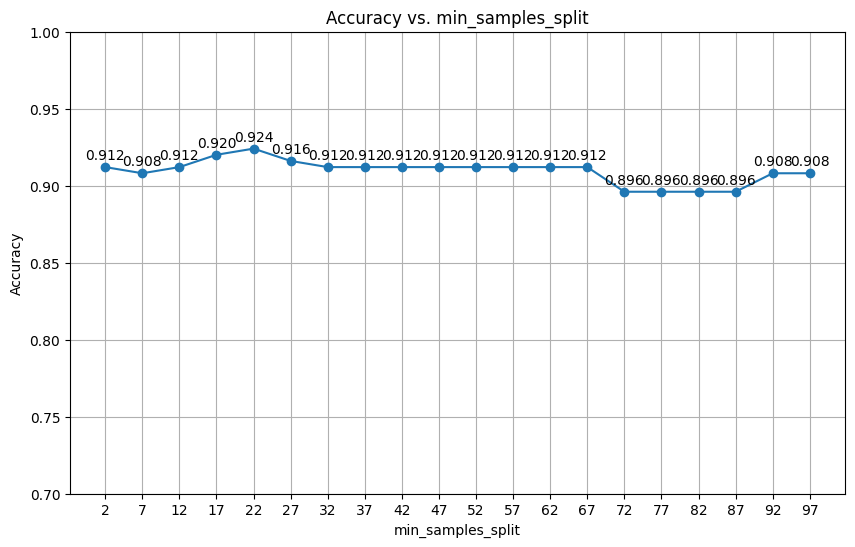

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generar datos
features_train, labels_train, features_test, labels_test = makeTerrainData()

# Arrays para almacenar valores min_samples_split y las precisiones
min_samples_splits = np.arange(2, 101, 5)
accuracies = []

for min_samples_split in min_samples_splits:
    clf = tree.DecisionTreeClassifier(min_samples_split=min_samples_split)
    clf.fit(features_train, labels_train)
    pred = clf.predict(features_test)
    accuracy = accuracy_score(pred, labels_test)
    accuracies.append(accuracy)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, accuracies, marker='o')
plt.title('Accuracy vs. min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(min_samples_splits)
plt.yticks(np.arange(0.7, 1.01, 0.05))  # Ajuste las marcas del eje y para una mejor visualización
for i, acc in enumerate(accuracies):
    plt.text(min_samples_splits[i], acc + 0.005, f'{acc:.3f}', ha='center')
plt.show()

## Precisión vs. min_samples_split vs. max_depth

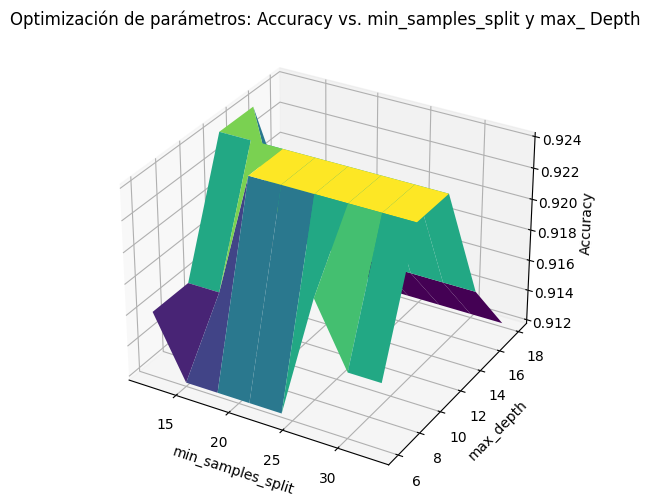

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Generar datos
features_train, labels_train, features_test, labels_test = makeTerrainData()

# Rangos de parámetros a considerar
min_samples_splits = np.arange(12, 35, 3)
max_depths = np.arange(6, 20, 3)

# Arrays para almacenar combinaciones de parámetros y las precisiones
param_combinations = []
accuracies = []
min_samples_split_new = []
max_depths_new = []

for min_samples_split in min_samples_splits:
    for max_depth in max_depths:
        clf = DecisionTreeClassifier(min_samples_split=min_samples_split, max_depth=max_depth)
        clf.fit(features_train, labels_train)
        pred = clf.predict(features_test)
        accuracy = accuracy_score(pred, labels_test)
        param_combinations.append((min_samples_split, max_depth))
        accuracies.append(accuracy)
        min_samples_split_new.append(min_samples_split)
        max_depths_new.append(max_depth)

# Graficar resultados en 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

min_samples_splits_mesh, max_depths_mesh = np.meshgrid(min_samples_splits, max_depths)
accuracies_array = np.array(accuracies).reshape(len(max_depths), len(min_samples_splits))

ax.plot_surface(min_samples_splits_mesh, max_depths_mesh, accuracies_array, cmap='viridis')
ax.set_title('Optimización de parámetros: Accuracy vs. min_samples_split y max_ Depth')
ax.set_xlabel('min_samples_split')
ax.set_ylabel('max_depth')
ax.set_zlabel('Accuracy')

plt.show()

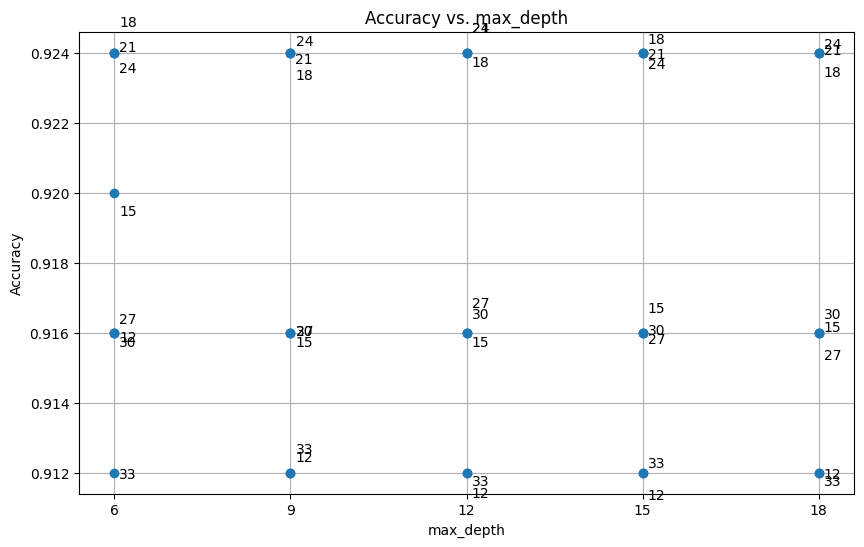

In [ ]:
# Graficar Accuracy vs. min_samples_split
plt.figure(figsize=(10, 6))
plt.plot(max_depths_new, accuracies, marker='o', linestyle='')
plt.title('Accuracy vs. max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(max_depths)
# Agregar etiquetas para min_samples_split
for i, txt in enumerate(min_samples_split_new):
  x_offset = random.randint(-10, 10)  # Generar random x-offset
  y_offset = random.randint(-20, 20)  # Generar random y-offset
  plt.annotate(f'{txt:.0f}', (max_depths_new[i], accuracies[i]), textcoords="offset points", xytext=(10,y_offset), ha='center')
plt.show()

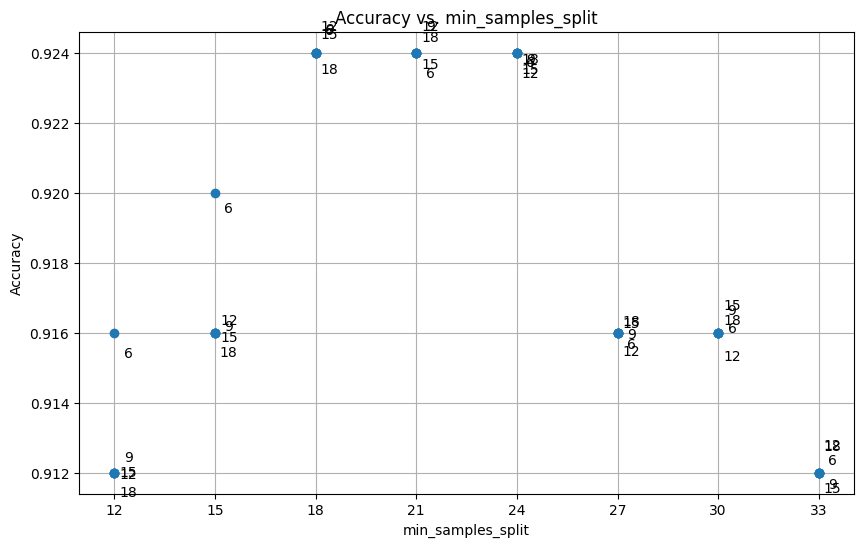

In [ ]:
# Graficar Accuracy vs. min_samples_split
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_new, accuracies, marker='o', linestyle='')
plt.title('Accuracy vs. min_samples_split')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(min_samples_splits)

# Agregar etiquetas para min_samples_split
for i, txt in enumerate(max_depths_new):
  x_offset = random.randint(-20, 20)  # Generar random x-offset
  y_offset = random.randint(-20, 20)  # Generar random y-offset
  plt.annotate(f'{txt:.0f}', (min_samples_split_new[i], accuracies[i]), textcoords="offset points", xytext=(10,y_offset), ha='center')
plt.show()